# Assignment Code: DA-AG-009
# **EDA | Assignment**

In [6]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
# first 10 rows.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('BIKE DETAILS.csv')
print(" first 10 rows:")
df.head(10)



 first 10 rows:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [9]:
# The shape and columns of given csv file: "BIKE DETAILS"
print(f"The shape:", df.shape)
print("The columns:")
print(df.columns)

The shape: (1061, 7)
The columns:
Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


In [14]:
# Question 2: Check for missing values in all columns and describe your approach for handling them.
print("Any Missing values")
print(df.isnull().sum())
print("Missing values in ex_showroom_price: ")
print(df["ex_showroom_price"].isnull().sum())

Any Missing values
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Missing values in ex_showroom_price: 
435


In [16]:
# Approach on handling missing values:
print(" As per the details provided above,\n i will suggest MAR(Missing at random) type of missing value issue.")
print("ex_showroom_price's missingness may depend on selling_price/bike year.")

 As per the details provided above,
 i will suggest MAR(Missing at random) type of missing value issue.
ex_showroom_price's missingness may depend on selling_price/bike year.



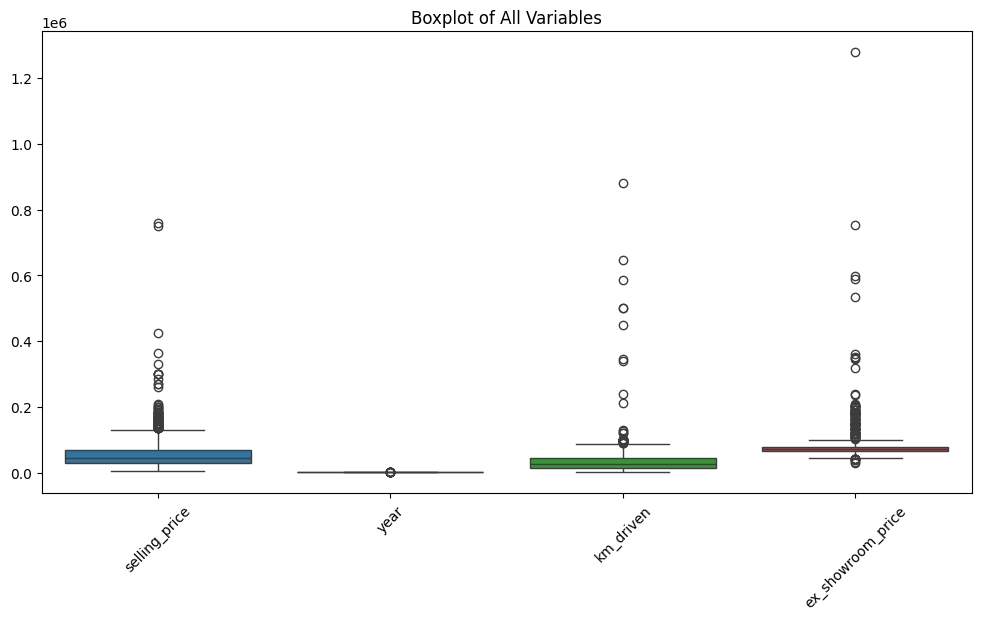

As outliers are many in ex_showroom_price feature, we will impute the missing values by median
After handling missing values of ex_showroom_price:
0

list of missing values after handling them:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  1061 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB
None


In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot of All Variables")
plt.xticks(rotation=45)
plt.show()
print("As outliers are many in ex_showroom_price feature, we will impute the missing values by median")
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)
print("After handling missing values of ex_showroom_price:")
print(df["ex_showroom_price"].isnull().sum())
print()
print("list of missing values after handling them:")
print(df.isnull().sum())
print(df.info())

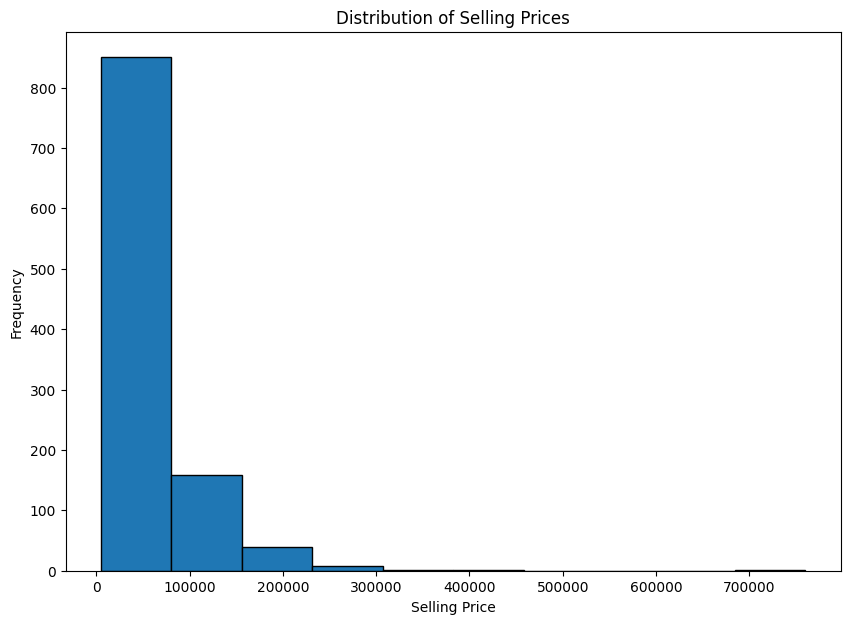

The frequency is highest in the lowest price range (around 0 to 100,000),
with a sharp decrease in frequency as the selling price increases.
This suggests that there are many more bikes available and sold in the lower price brackets,
and fewer bikes available in the higher price ranges.


In [45]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

plt.figure(figsize=(10,7))
plt.hist(df['selling_price'], bins=10, edgecolor='black')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()
print("The frequency is highest in the lowest price range (around 0 to 100,000),\nwith a sharp decrease in frequency as the selling price increases.\nThis suggests that there are many more bikes available and sold in the lower price brackets,\nand fewer bikes available in the higher price ranges.")

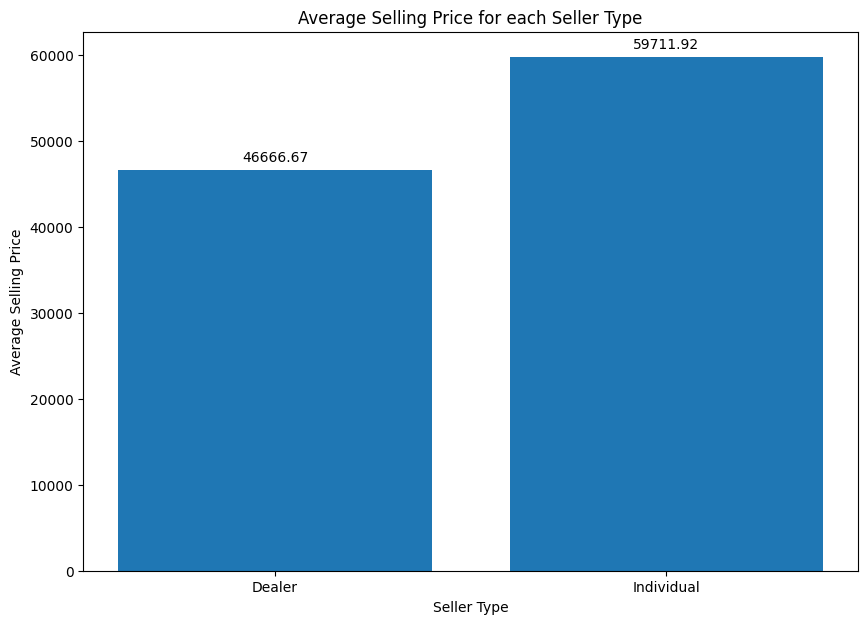

Looking at the bar plot,
we can observe that the average selling price for bikes sold by
'Individual' sellers is higher than for bikes sold by 'Dealer' sellers.


In [49]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

avg_selling_price = df.groupby('seller_type')['selling_price'].mean()
plt.figure(figsize=(10,7))
plt.bar(avg_selling_price.index, avg_selling_price.values)
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price for each Seller Type')

# Add labels to the bars
for i, v in enumerate(avg_selling_price.values):
    plt.text(i, v + 1000, "{:.2f}".format(v), ha='center')

plt.show()
print("Looking at the bar plot,\nwe can observe that the average selling price for bikes sold by\n'Individual' sellers is higher than for bikes sold by 'Dealer' sellers.")

Average km_driven for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


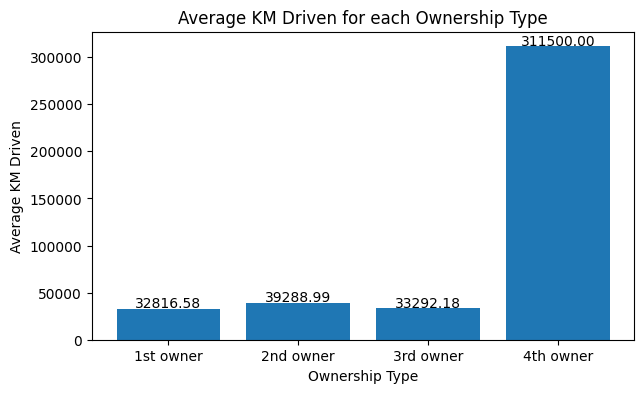

we can observe that bikes with 4th owner have a significantly higher average km driven
compared to other ownership types.


In [56]:
# Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

avg_km_driven = df.groupby('owner')['km_driven'].mean()
print("Average km_driven for each ownership type:")
print(avg_km_driven)
plt.figure(figsize=(7,4))
plt.bar(avg_km_driven.index, avg_km_driven.values)
plt.xlabel('Ownership Type')
plt.ylabel('Average KM Driven')
plt.title('Average KM Driven for each Ownership Type')

# Add labels to the bars
for i, v in enumerate(avg_km_driven.values):
    plt.text(i, v + 1000, "{:.2f}".format(v), ha='center')

plt.show()
print("we can observe that bikes with 4th owner have a significantly higher average km driven\ncompared to other ownership types.")

In [78]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

summary = df["km_driven"].describe()

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)].shape[0]

summary_with_outliers = summary.to_frame()
summary_with_outliers['outlier_count'] = outliers

print("Summary statistics of km_driven before removing outliers:")
print(summary_with_outliers)

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()

summary_no_outliers = df_no_outliers["km_driven"].describe().to_frame()
summary_no_outliers['outlier_count'] = 0 # Since outliers are removed

print("\nSummary statistics of km_driven after removing outliers:")
print(summary_no_outliers)

Summary statistics of km_driven before removing outliers:
           km_driven  outlier_count
count    1061.000000             39
mean    34359.833176             39
std     51623.152702             39
min       350.000000             39
25%     13500.000000             39
50%     25000.000000             39
75%     43000.000000             39
max    880000.000000             39

Summary statistics of km_driven after removing outliers:
          km_driven  outlier_count
count   1022.000000              0
mean   28203.415851              0
std    19552.083583              0
min      350.000000              0
25%    13000.000000              0
50%    24000.000000              0
75%    40000.000000              0
max    86000.000000              0


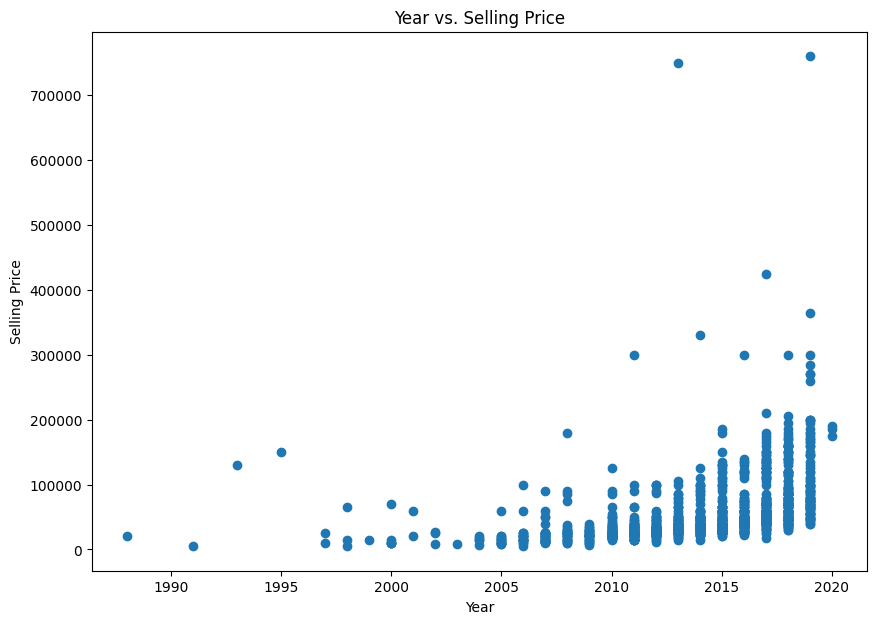

In [79]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

plt.figure(figsize=(10,7))
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs. Selling Price')
plt.show()

"""
Concentration of older bikes at lower prices: There is a significant number of points clustered at the lower
end of the selling price range for older years. This is expected, as bikes depreciate over time.
Increasing spread of selling prices in recent years: For newer bikes (say, from 2015 onwards),
the spread of selling prices is much wider. This indicates that while newer bikes are generally more expensive,
there's a greater variation in price among them. This could be due to different models, features, or conditions of newer bikes.

Outliers: There are some data points that stand out. For example,
you might see some older bikes with surprisingly high selling prices or some relatively newer bikes with low selling prices.
These could represent classic or rare bikes (higher price for older year) or bikes that have high mileage, damage,
or are from less popular models (lower price for newer year).

In summary, the scatter plot clearly illustrates the impact of a bike's age on its selling price,
with newer bikes generally commanding higher prices, but other factors contribute to the variation in prices, especially in recent years.

"""


In [86]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix=['seller'], dtype=int)
print(df_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_Dealer  seller_Individual  
0        350            72752.5              0                  1  
1       5650            72752.5              0                  1  
2      12000           148114.0              0                  1  
3      23000            89643.0              0                  1  
4      21000            72752.5              0                  1  


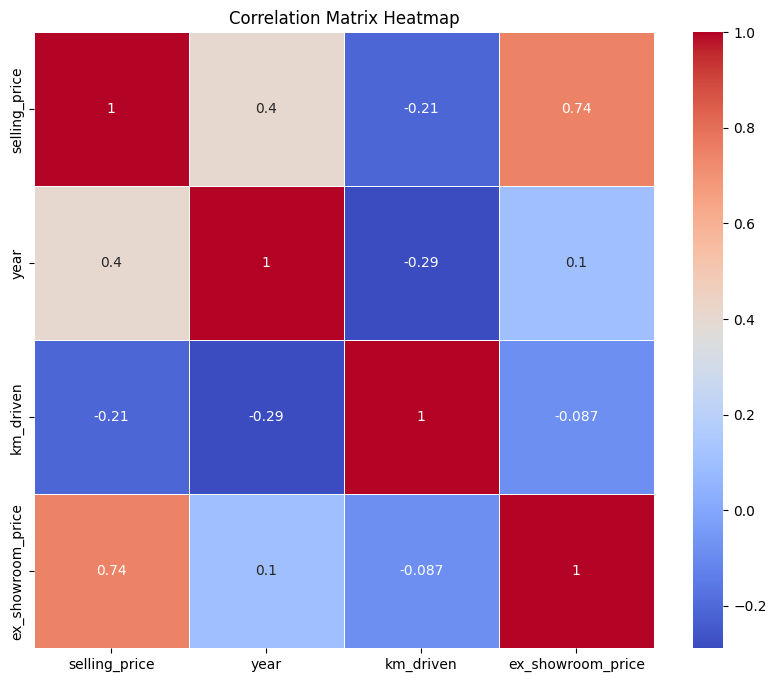

In [88]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

numeric_df = df.select_dtypes(include=np.number) # to select only numeric columns
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
"""
Looking at the heatmap of the correlation matrix, the correlations that stand out the most are:

1> selling_price and ex_showroom_price: There is a strong positive correlation (0.74) between these two columns.
This is expected, as the ex-showroom price is a major component of the selling price.

2> year and selling_price: There is a moderate positive correlation (0.40) between the year and selling price,
indicating that newer bikes tend to have higher selling prices.

3> year and km_driven: There is a moderate negative correlation (-0.29) between the year and km_driven,
suggesting that newer bikes generally have lower mileage.

"""

10. Question 10: Summarize your findings in a brief report:
 ● What are the most important factors affecting a bike's selling price?
 ● Mention any data cleaning or feature engineering you performed.


 Ans>
 1. Data shape:  (1061, 7)
 2. Data columns: 'name', 'selling_price', 'year', 'seller_type' 'owner', 'km_driven','ex_showroom_price'.
 3. Datatypes: float64(1), int64(3), object(3)
 4. Missing values: present only in (ex_showroom_price) feature: 435. I handled mising values by using imputation method(median) as the feature had many outliers, and it is showing MAR ( Missing at random) type, as ex_showroom_price & selling_price both are co-dependent on each other.
 5. Box plot shows the frequency of outliers in different features of the dataset.
 6. the histogram plot of distribution of selling price explicates that the low cost(0- 1 lakh)rs. of bikes were sold in larger frequency rather than expensive bikes. his suggests that there are many more bikes available and sold in the lower price brackets,
and fewer bikes available in the higher price ranges
7. bar plot of average selling price for each seller type: we can observe that the average selling price for bikes sold by
'Individual' sellers is higher than for bikes sold by 'Dealer' sellers.
8. we can observe that bikes with 4th owner have a significantly higher average km driven compared to other ownership types.
9. outliers detection and treatment done in km_driven.

